In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Reading in all data of use
train_data = pd.read_csv('peter_data/train.csv')

In [3]:
train_data.sort_values(by='GrLivArea',ascending=False)[:2]

train_data = train_data.drop(train_data[train_data['Id']==1299].index)
train_data = train_data.drop(train_data[train_data['Id']==524].index)

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


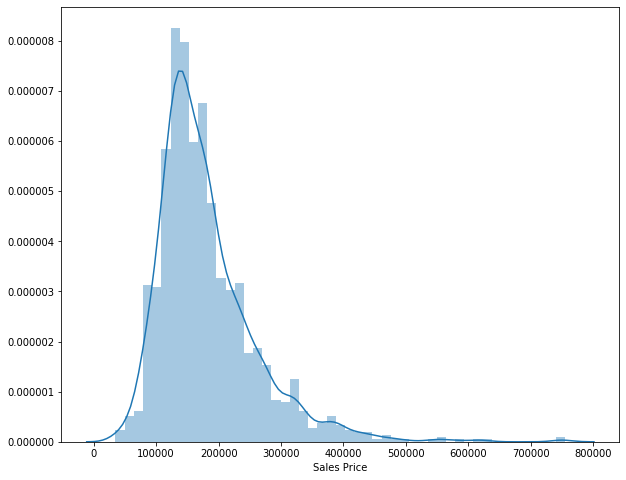

In [4]:
print(train_data['SalePrice'].describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(train_data['SalePrice'], ax=ax1).set(xlabel='Sales Price');

In [5]:
train_data.loc[:, "MasVnrArea"] = train_data.loc[:, "MasVnrArea"].fillna(train_data["MasVnrArea"].mean())
train_data.loc[:, "MasVnrType"] = train_data.loc[:, "MasVnrType"].fillna(0)
train_data.loc[:, "BsmtFinType1"] = train_data.loc[:, "BsmtFinType1"].fillna(0)
train_data.loc[:, "BsmtQual"] = train_data.loc[:, "BsmtQual"].fillna(0)
train_data.loc[:, "BsmtCond"] = train_data.loc[:, "BsmtCond"].fillna(0)
train_data.loc[:, "BsmtExposure"] = train_data.loc[:, "BsmtExposure"].fillna(0)
train_data.loc[:, "BsmtFinType2"] = train_data.loc[:, "BsmtFinType2"].fillna(0)
train_data.loc[:, "GarageQual"] = train_data.loc[:, "GarageQual"].fillna(0)
train_data.loc[:, "GarageCond"] = train_data.loc[:, "GarageCond"].fillna("0")
train_data.loc[:, "GarageFinish"] = train_data.loc[:, "GarageFinish"].fillna(0)
train_data.loc[:, "GarageType"] = train_data.loc[:, "GarageFinish"].fillna(0)

train_data.loc[:, "GarageYrBlt"] = train_data.loc[:, "GarageYrBlt"].fillna(train_data["GarageYrBlt"].median())

train_data.loc[:, "LotFrontage"] = train_data.loc[:, "LotFrontage"].fillna(train_data["LotFrontage"].mean())

train_data.loc[:, "FireplaceQu"] = train_data.loc[:, "FireplaceQu"].fillna(0)
train_data.loc[:, "Fence"] = train_data.loc[:, "Fence"].fillna(0)
train_data.loc[:, "Alley"] = train_data.loc[:, "Alley"].fillna(0)
train_data.loc[:, "MiscFeature"] = train_data.loc[:, "MiscFeature"].fillna(0)
train_data.loc[:, "Electrical"] = train_data.loc[:, "Electrical"].fillna("SBrkr")
train_data.loc[:, "PoolQC"] = train_data.loc[:, "PoolQC"].fillna(0)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train_df = train_data.select_dtypes(include=numerics)

numeric_train_df = numeric_train_df.drop(["Id"], axis=1)

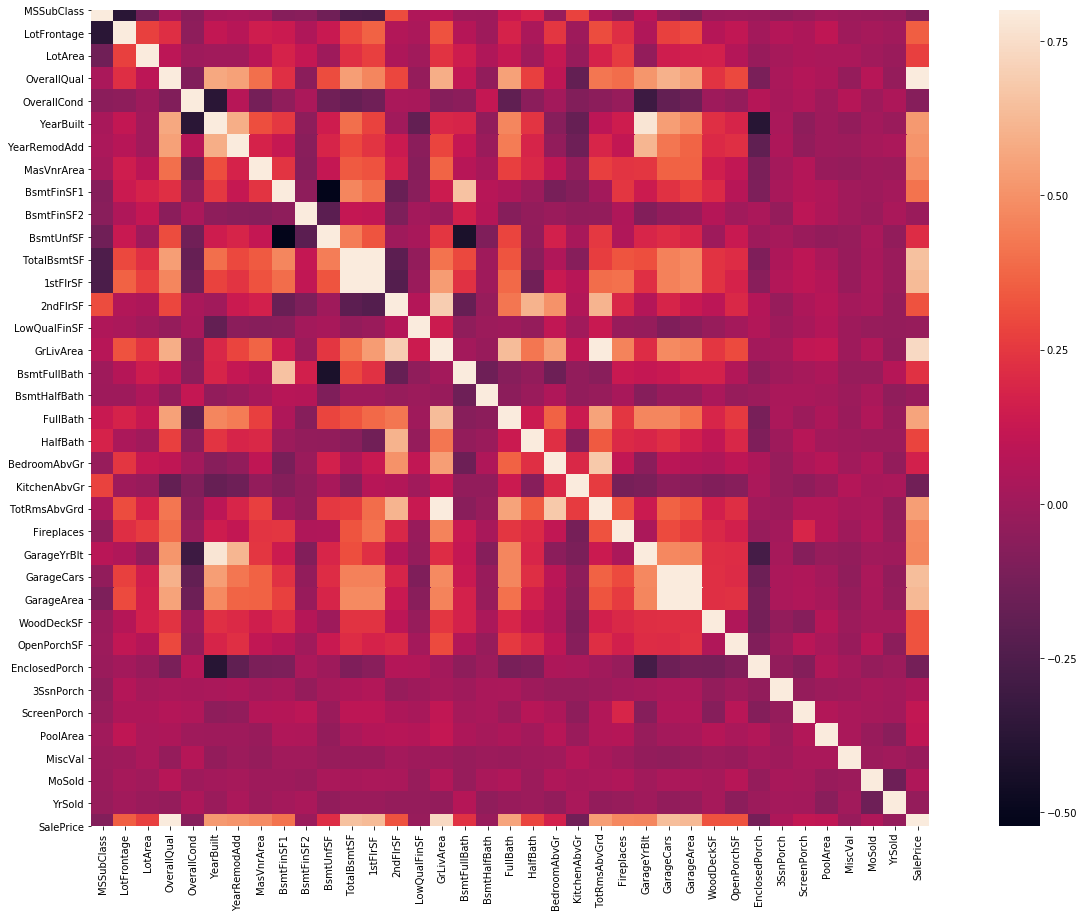

In [7]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
from scipy import stats
outliers = numeric_train_df.drop(['SalePrice'], axis = 1)
numeric_train_df = numeric_train_df[(np.abs(stats.zscore(outliers)) < 3).all(axis=1)]

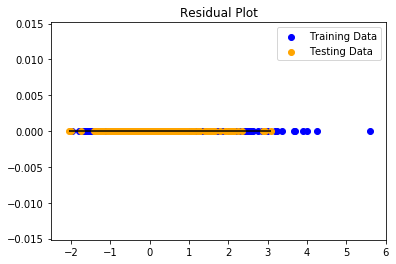

MSE: 6.780289355890817e-31, R2: 1.0

1.0
1.0


In [9]:
from sklearn.model_selection import train_test_split
X = numeric_train_df.drop(["OverallQual"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

In [10]:
numeric_train_df["OverallQual"]

0       7
2       7
4       8
6       8
10      5
       ..
1452    5
1453    5
1454    7
1455    6
1456    6
Name: OverallQual, Length: 1017, dtype: int64

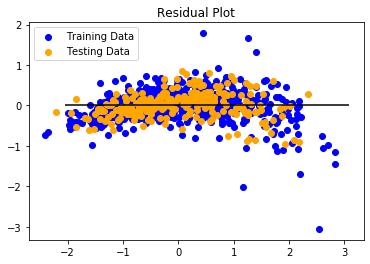

MSE: 0.09732776956340165, R2: 0.8894528863667226

0.8747818277578122
0.8894528863667226


In [11]:
from sklearn.model_selection import train_test_split
X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

In [12]:
X_train.shape

(762, 36)

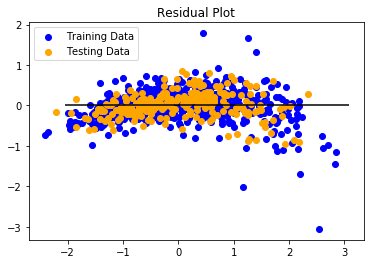

MSE: 0.09729330120196689, R2: 0.8894920363224379

0.8747811108487304
0.8894920363224379


In [13]:
numeric_train_df = numeric_train_df.drop(['KitchenAbvGr',"BsmtHalfBath","PoolArea"], axis =1)   

# numeric_train_df = numeric_train_df.drop(['TotRmsAbvGrd','GarageYrBlt'], axis =1)   

X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

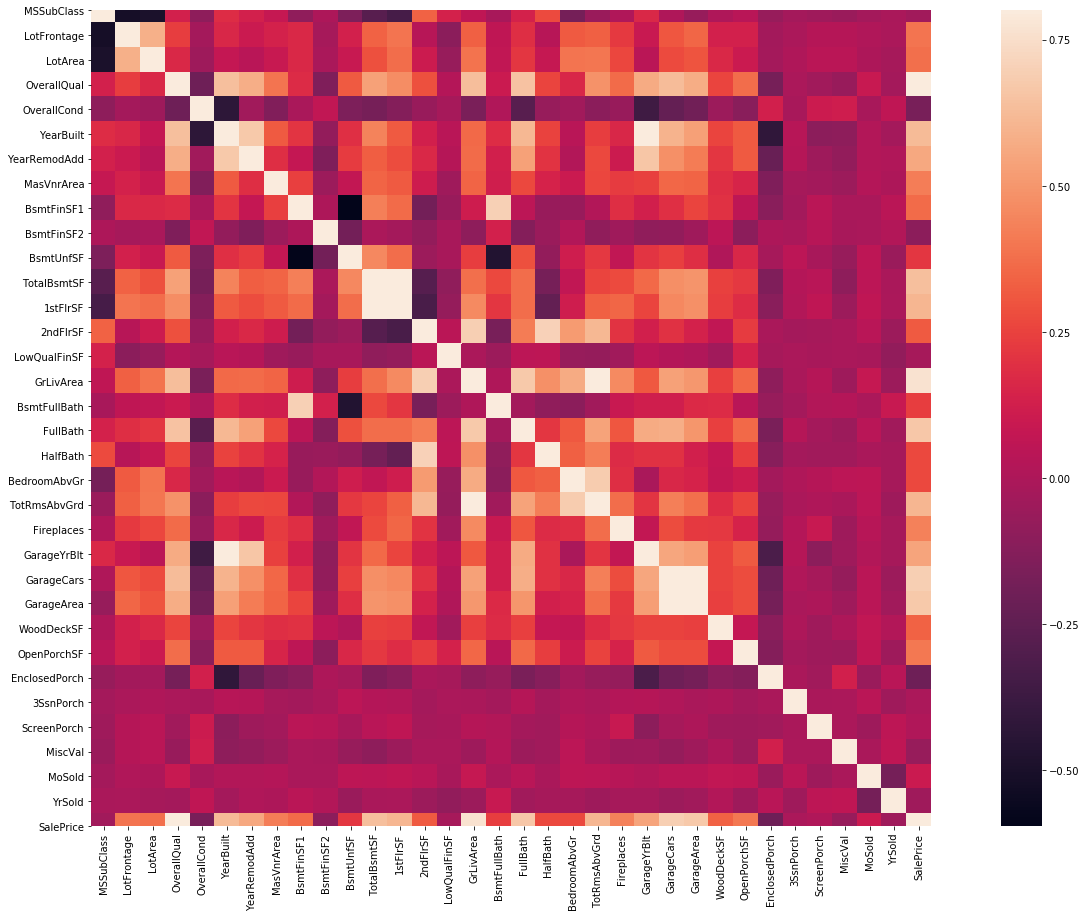

In [14]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

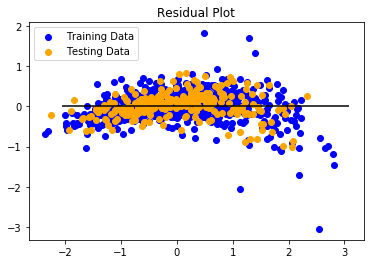

MSE: 0.09807601178610048, R2: 0.888603015683474

0.8737603320924956
0.888603015683474


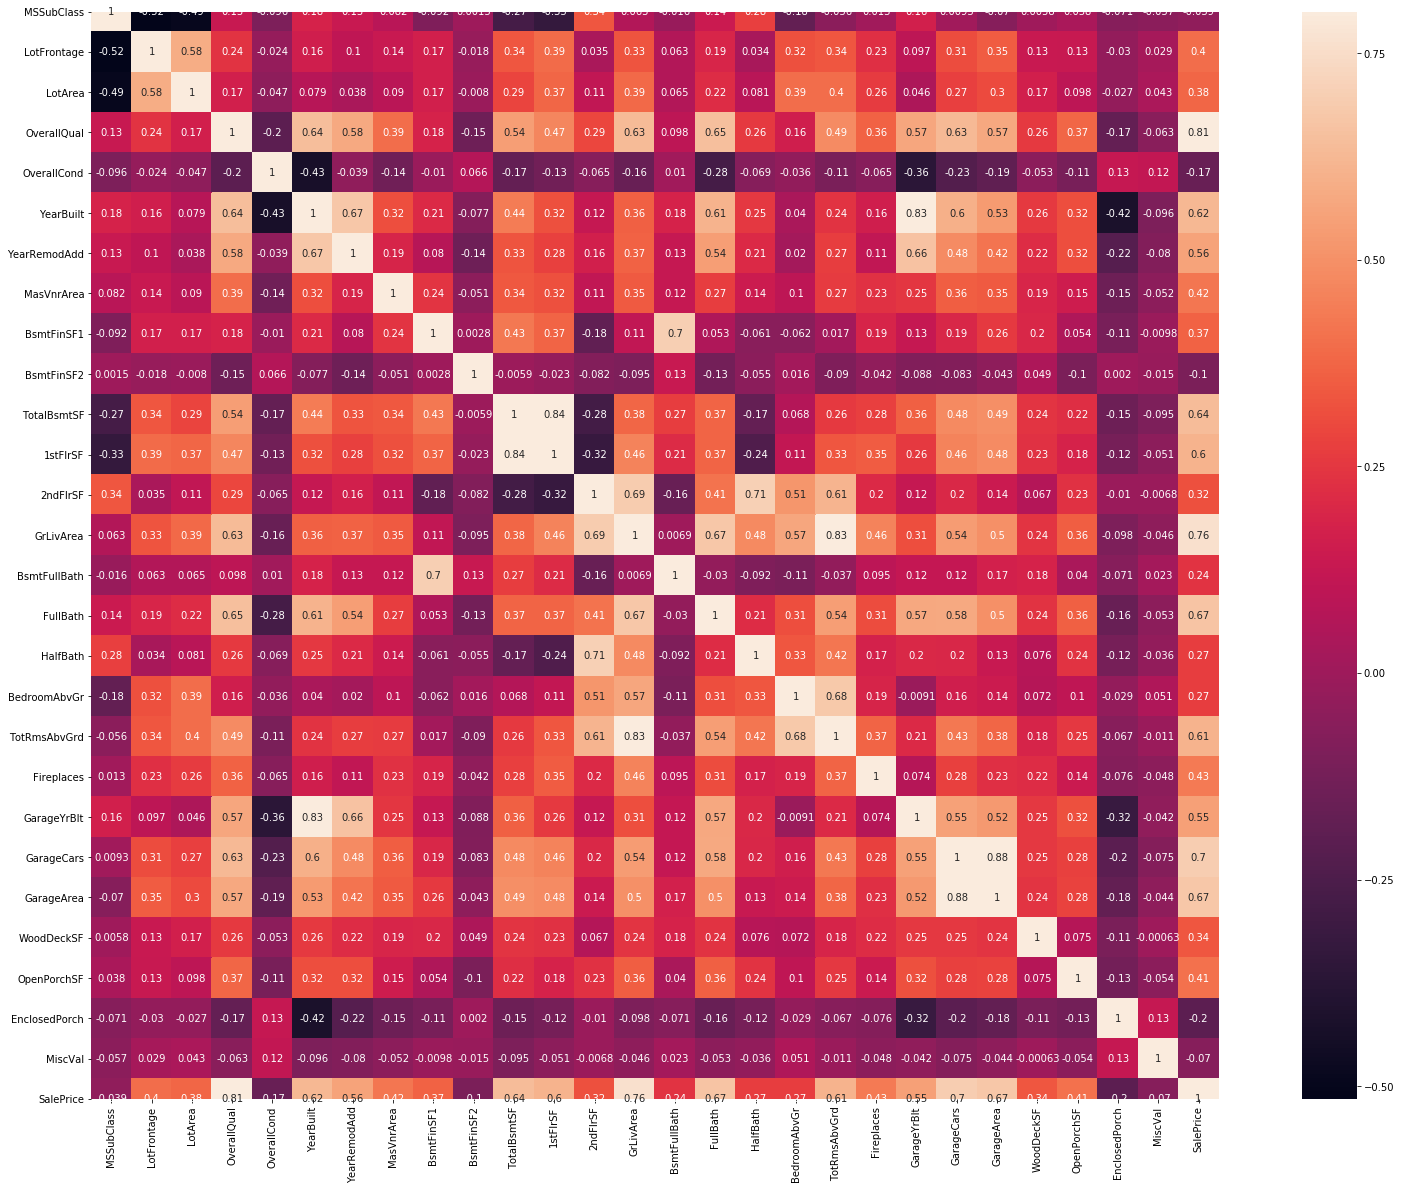

In [15]:
numeric_train_df = numeric_train_df.drop(['YrSold','MoSold','ScreenPorch','3SsnPorch','BsmtUnfSF','LowQualFinSF'], axis =1)   

# numeric_train_df = numeric_train_df.drop(['TotRmsAbvGrd','GarageYrBlt'], axis =1)   

X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [16]:
numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:80]

OverallQual      0.811766
GrLivArea        0.762521
GarageCars       0.695295
GarageArea       0.673668
FullBath         0.665162
TotalBsmtSF      0.636814
YearBuilt        0.621000
TotRmsAbvGrd     0.605622
1stFlrSF         0.604942
YearRemodAdd     0.557850
GarageYrBlt      0.547031
Fireplaces       0.432079
MasVnrArea       0.423490
OpenPorchSF      0.407542
LotFrontage      0.396284
LotArea          0.375863
BsmtFinSF1       0.368165
WoodDeckSF       0.337059
2ndFlrSF         0.319866
HalfBath         0.270149
BedroomAbvGr     0.268112
BsmtFullBath     0.238365
MSSubClass      -0.038736
MiscVal         -0.070223
BsmtFinSF2      -0.101106
OverallCond     -0.165062
EnclosedPorch   -0.201699
Name: SalePrice, dtype: float64

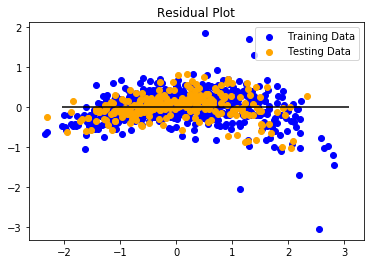

MSE: 0.09811304814753977, R2: 0.8885609489344366

0.8734306283624502
0.8885609489344366


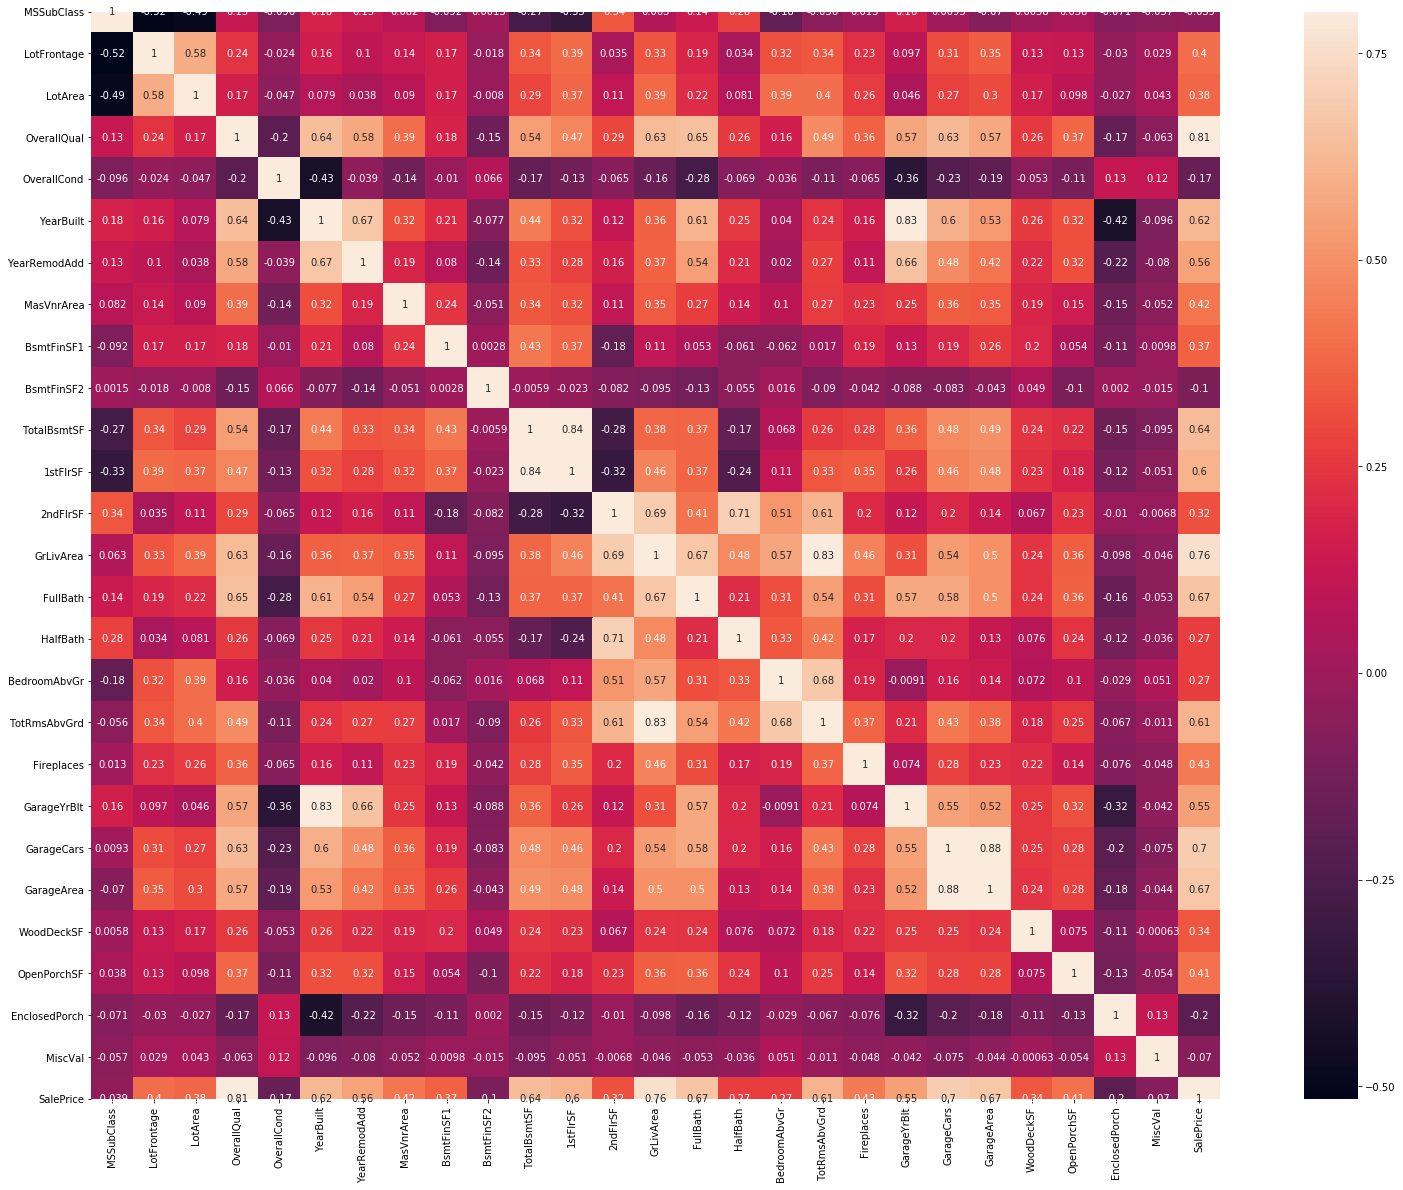

In [17]:
numeric_train_df = numeric_train_df.drop(['BsmtFullBath'], axis =1)   


X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [18]:
numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:80]

OverallQual      0.811766
GrLivArea        0.762521
GarageCars       0.695295
GarageArea       0.673668
FullBath         0.665162
TotalBsmtSF      0.636814
YearBuilt        0.621000
TotRmsAbvGrd     0.605622
1stFlrSF         0.604942
YearRemodAdd     0.557850
GarageYrBlt      0.547031
Fireplaces       0.432079
MasVnrArea       0.423490
OpenPorchSF      0.407542
LotFrontage      0.396284
LotArea          0.375863
BsmtFinSF1       0.368165
WoodDeckSF       0.337059
2ndFlrSF         0.319866
HalfBath         0.270149
BedroomAbvGr     0.268112
MSSubClass      -0.038736
MiscVal         -0.070223
BsmtFinSF2      -0.101106
OverallCond     -0.165062
EnclosedPorch   -0.201699
Name: SalePrice, dtype: float64

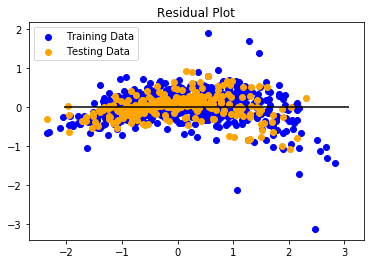

MSE: 0.09666703357846029, R2: 0.8902033654574956

0.8711871144774879
0.8902033654574956


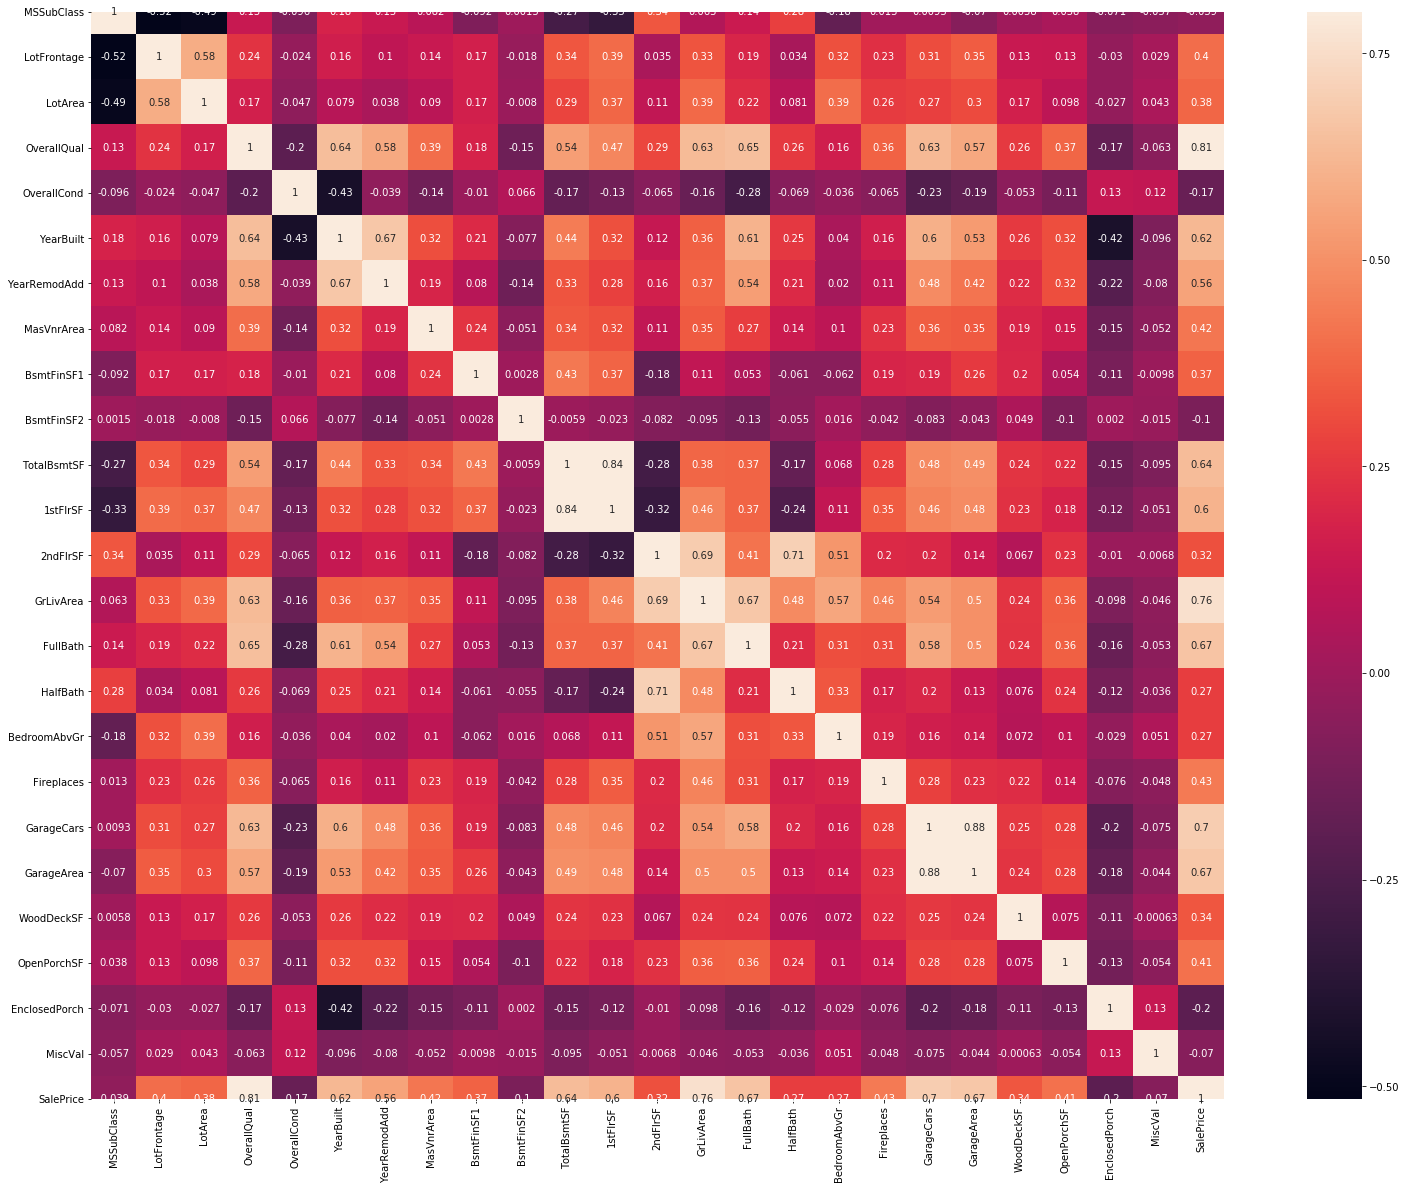

In [19]:
numeric_train_df = numeric_train_df.drop(['TotRmsAbvGrd','GarageYrBlt'], axis =1)   


X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

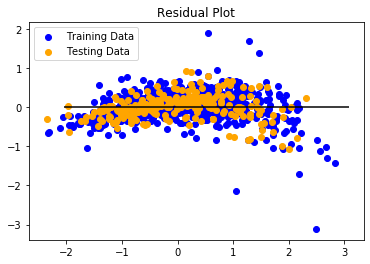

MSE: 0.096421443188141, R2: 0.8904823126573302

0.87104541030613
0.8904823126573302


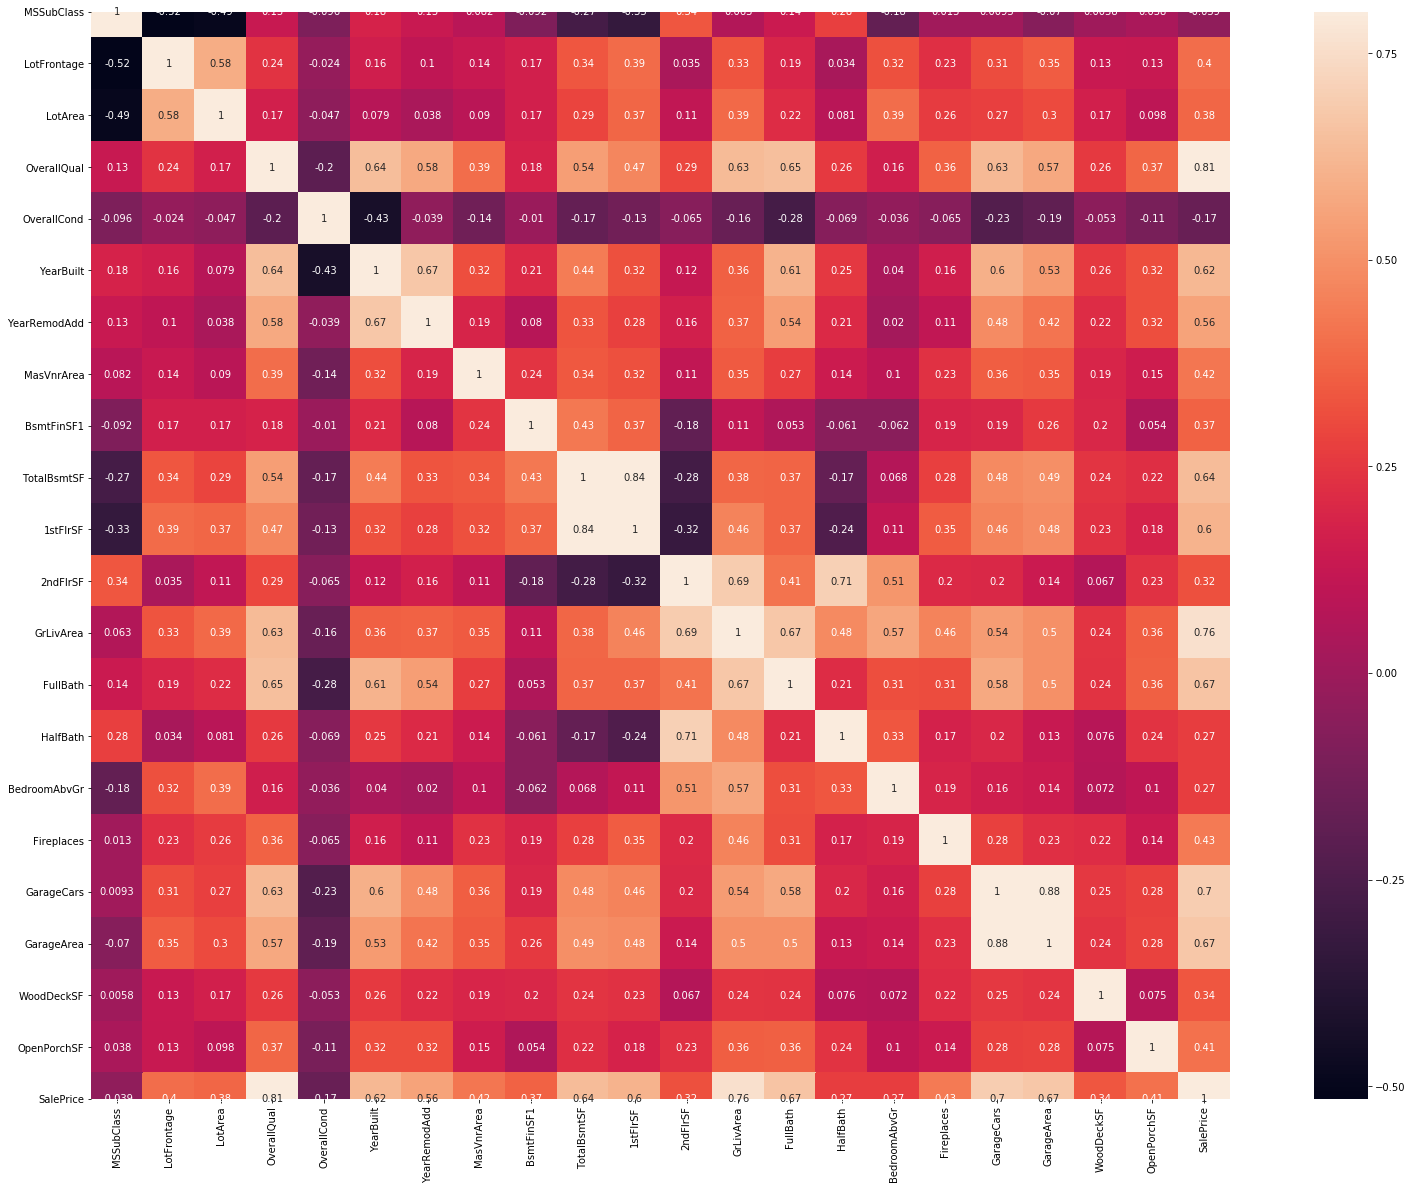

In [20]:
numeric_train_df = numeric_train_df.drop(['EnclosedPorch','MiscVal','BsmtFinSF2'], axis =1)   


X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [21]:
# numeric_train_df = numeric_train_df.drop(['1stFlrSF'], axis =1)   


# X = numeric_train_df.drop(["SalePrice"], axis =1)
# y = numeric_train_df["SalePrice"]
# y = pd.DataFrame(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")
# print()

# print(model.score(X_train_scaled,y_train_scaled))

# print(model.score(X_test_scaled,y_test_scaled))

# corrmat = numeric_train_df.corr()
# f, ax = plt.subplots(figsize=(30, 20))
# sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [22]:
categorical_train_df = train_data.select_dtypes(include=['object']).copy()
categorical_train_df["SalePrice"]= train_data["SalePrice"]
categorical_train_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,208500
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,0,WD,Normal,181500
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,223500
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,0,0,0,WD,Abnorml,140000
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,0,0,0,WD,Normal,175000
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal,210000
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,0,0,0,WD,Normal,142125


In [23]:
categorical_train_df = categorical_train_df.replace({
    "Utilities": {"AllPub": 1, "NoSeWa":0},
    "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "ExterCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "BsmtQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5 },
    "BsmtCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "BsmtExposure": {"No": 0, "None": 0, "Mn": 1, "Av": 2, "Gd": 3},
    "BsmtFinType1": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
    "BsmtFinType2": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
    "HeatingQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "Functional": {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2":5, "Min1": 6, "Typ": 7},
    "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin":3},
    "GarageQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    "GarageCond": {"0": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
    
     })

In [24]:
pd.get_dummies(categorical_train_df, columns=["MSZoning","LotShape",
                                    "LandContour","LotConfig","LandSlope","Neighborhood",
                                   "Condition1","Condition2","BldgType",
                                   "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                                   "MasVnrType","Foundation","Electrical","GarageType","PavedDrive",
                                   "SaleType","SaleCondition"])

,Street,Alley,Utilities,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Pave,0,1,3,2,4,3,0,6,1,...,0,0,0,1,0,0,0,0,1,0
1,Pave,0,1,2,2,4,3,3,5,1,...,0,0,0,1,0,0,0,0,1,0
2,Pave,0,1,3,2,4,3,1,6,1,...,0,0,0,1,0,0,0,0,1,0
3,Pave,0,1,2,2,3,4,0,5,1,...,0,0,0,1,1,0,0,0,0,0
4,Pave,0,1,3,2,4,3,2,6,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,0,1,2,2,4,3,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1456,Pave,0,1,2,2,4,3,0,5,3,...,0,0,0,1,0,0,0,0,1,0
1457,Pave,0,1,4,3,3,4,0,6,1,...,0,0,0,1,0,0,0,0,1,0
1458,Pave,0,1,2,2,3,3,1,6,3,...,0,0,0,1,0,0,0,0,1,0


In [25]:
categorical_train_df = pd.get_dummies(categorical_train_df, columns=['Street','CentralAir'])
categorical_train_df = categorical_train_df.rename(columns={"Street_Pave": "Street_Paved", "CentralAir_Y": "CentralAir_Yes"})
categorical_train_df = categorical_train_df.drop(['Street_Grvl','CentralAir_N'], axis=1)

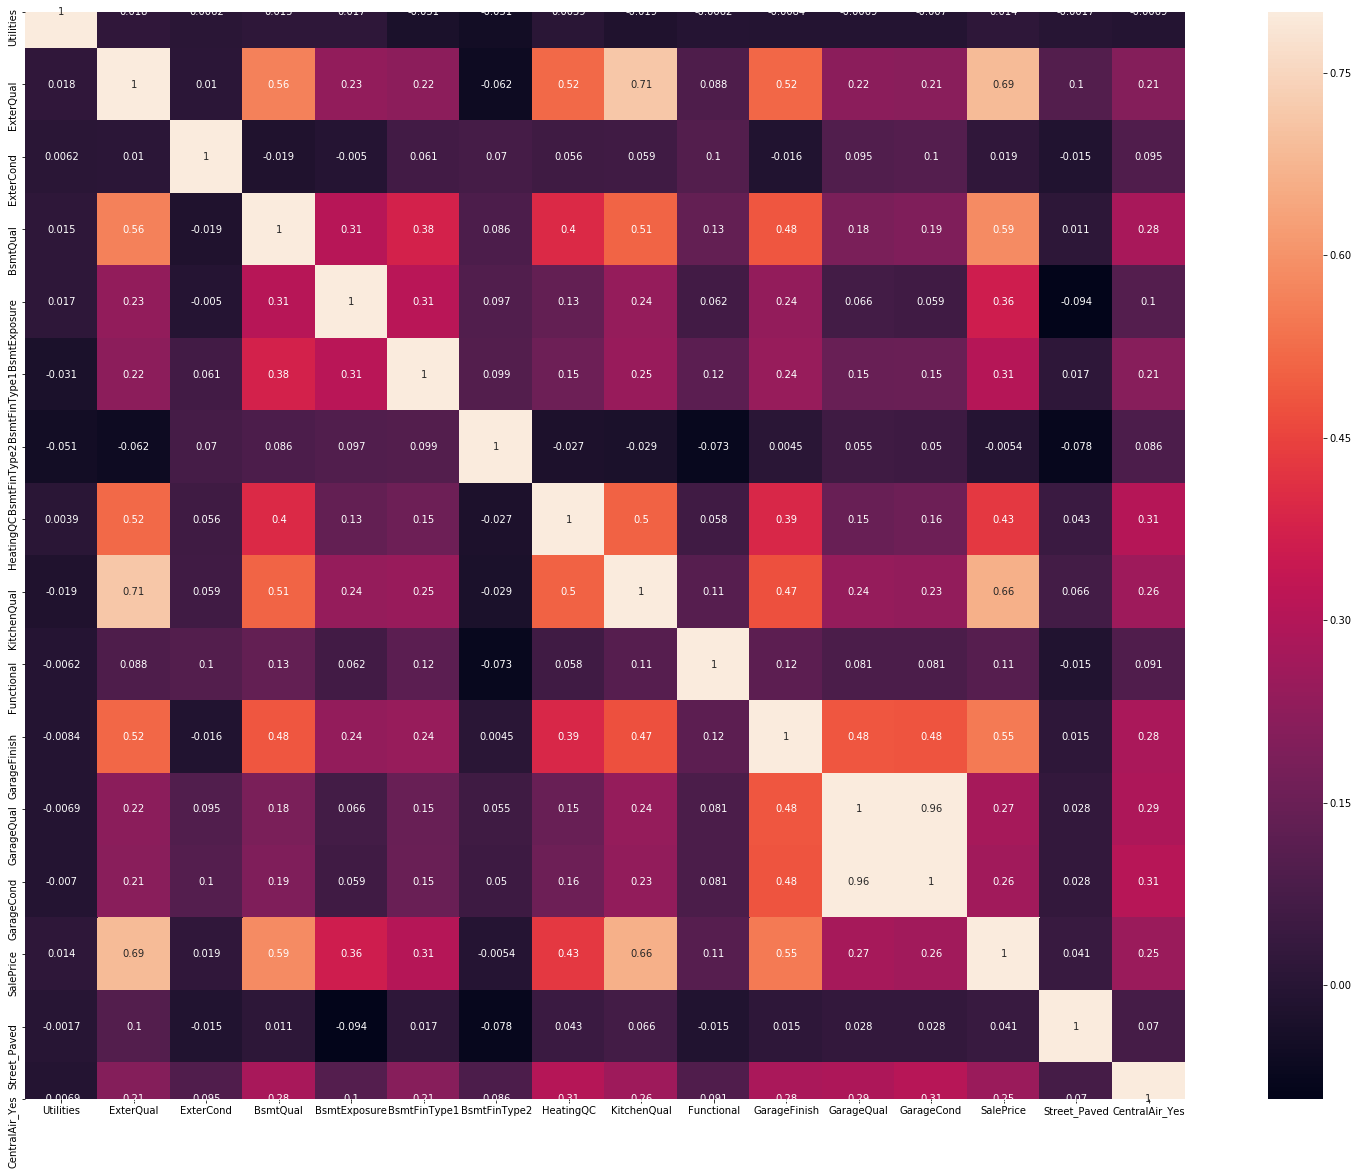

In [26]:
corrmat = categorical_train_df.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [29]:
categorical_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:80]

ExterQual         0.686756
KitchenQual       0.662236
BsmtQual          0.586674
GarageFinish      0.550255
HeatingQC         0.428024
BsmtExposure      0.363476
BsmtFinType1      0.305372
GarageQual        0.273898
GarageCond        0.263249
CentralAir_Yes    0.251385
Functional        0.107661
Street_Paved      0.041046
ExterCond         0.018865
Utilities         0.014319
BsmtFinType2     -0.005364
Name: SalePrice, dtype: float64